In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy()
        print("Using GPU!")
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print("No GPU found, using CPU.")

Using GPU!


In [3]:
# Load Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


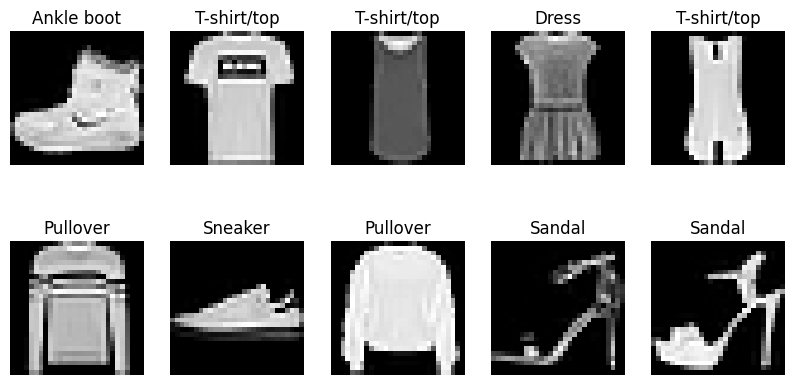

In [4]:
# EDA: Display sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [5]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Build Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Train Model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7668 - loss: 0.6715 - val_accuracy: 0.8482 - val_loss: 0.4290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8541 - loss: 0.4066 - val_accuracy: 0.8583 - val_loss: 0.3890
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8646 - loss: 0.3760 - val_accuracy: 0.8598 - val_loss: 0.3879
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8696 - loss: 0.3540 - val_accuracy: 0.8689 - val_loss: 0.3611
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8768 - loss: 0.3339 - val_accuracy: 0.8701 - val_loss: 0.3590
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8817 - loss: 0.3196 - val_accuracy: 0.8768 - val_loss: 0.3493
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8879 - loss: 0.2997 - val_accuracy: 0.8703 - val_loss: 0.3544
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8857 - loss: 0.3007 

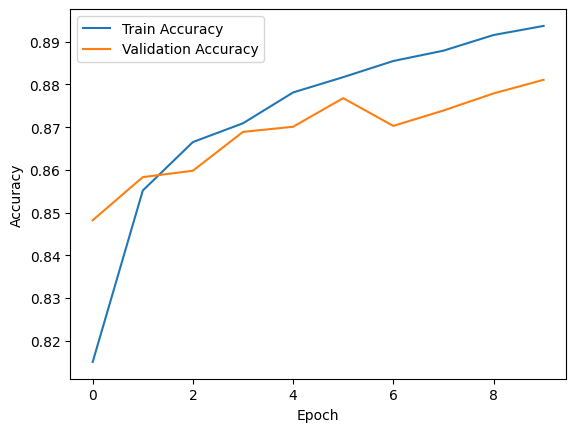

In [8]:
# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Q. If we invert pixel values of the Mnist dataset will a model train on the original images, still perform accurately?**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3635 - loss: 2.3054 - val_accuracy: 0.7088 - val_loss: 0.8050
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6234 - loss: 0.9748 - val_accuracy: 0.7577 - val_loss: 0.6883
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6683 - loss: 0.8647 - val_accuracy: 0.7847 - val_loss: 0.6287
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7142 - loss: 0.7977 - val_accuracy: 0.7835 - val_loss: 0.6235
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7353 - loss: 0.7332 - val_accuracy: 0.7987 - val_loss: 0.5772


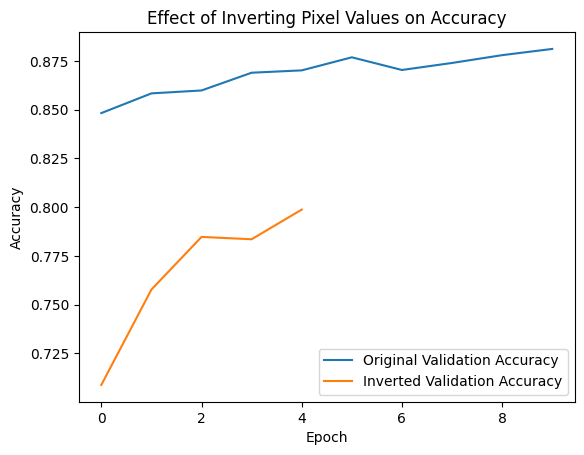

In [9]:
# Invert Image Pixels
inverted_train = 1 - train_images
inverted_test = 1 - test_images
history_inverted = model.fit(inverted_train, train_labels, epochs=5, validation_data=(inverted_test, test_labels))

# Compare accuracy before and after inversion
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_inverted.history['val_accuracy'], label='Inverted Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Inverting Pixel Values on Accuracy')
plt.show()

## **Q. How could adding random noise to images impact the classification accuracy of the training model?**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7986 - loss: 0.7169 - val_accuracy: 0.8551 - val_loss: 0.4124
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8534 - loss: 0.3915 - val_accuracy: 0.8439 - val_loss: 0.4420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8637 - loss: 0.3654 - val_accuracy: 0.8545 - val_loss: 0.4144
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8725 - loss: 0.3427 - val_accuracy: 0.8559 - val_loss: 0.4010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8752 - loss: 0.3347 - val_accuracy: 0.8565 - val_loss: 0.4076


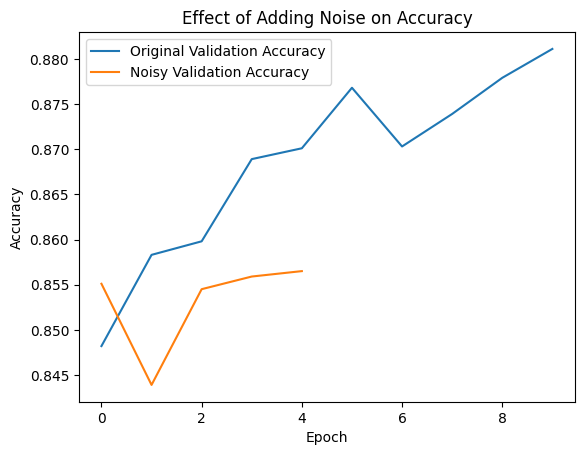

In [10]:
# Add Noise to Images
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.randn(*train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.randn(*test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)
history_noisy = model.fit(train_images_noisy, train_labels, epochs=5, validation_data=(test_images_noisy, test_labels))

# Compare accuracy before and after adding noise
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_noisy.history['val_accuracy'], label='Noisy Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Adding Noise on Accuracy')
plt.show()

## **Q. Is it possible to achieve higher accuracy on fashion Mnist dataset by resizing the image resolution from 28*28 to 56*56?**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7525 - loss: 0.6906 - val_accuracy: 0.8262 - val_loss: 0.4650
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8325 - loss: 0.4597 - val_accuracy: 0.8471 - val_loss: 0.4254
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.4253 - val_accuracy: 0.8576 - val_loss: 0.3997
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8520 - loss: 0.4038 - val_accuracy: 0.8626 - val_loss: 0.3824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8535 - loss: 0.3940 - val_accuracy: 0.8612 - val_loss: 0.3961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8576 - loss: 0.3884 - val_accuracy: 0.8677 - val_loss: 0.3721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8613 - loss: 0.3709 - val_accuracy: 0.8697 - val_loss: 0.3743
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8642 - loss: 0.3612 -

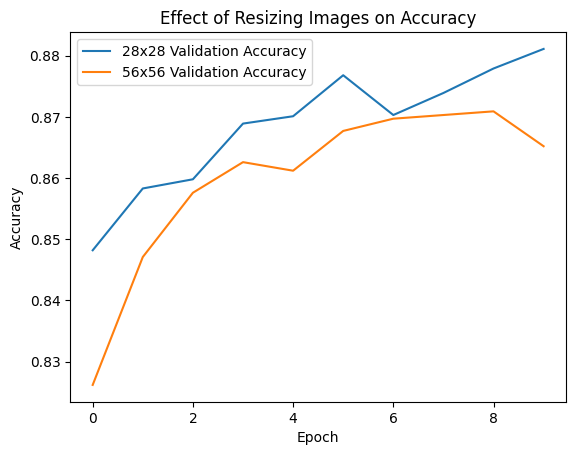

In [11]:
# Resize to 56x56
train_images_resized = tf.image.resize(train_images[..., np.newaxis], (56, 56)).numpy()
test_images_resized = tf.image.resize(test_images[..., np.newaxis], (56, 56)).numpy()

model_large = Sequential([
    Flatten(input_shape=(56, 56)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_large.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large = model_large.fit(train_images_resized, train_labels, epochs=10, validation_data=(test_images_resized, test_labels))

# Compare accuracy before and after resizing
plt.plot(history.history['val_accuracy'], label='28x28 Validation Accuracy')
plt.plot(history_large.history['val_accuracy'], label='56x56 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Resizing Images on Accuracy')
plt.show()

## **Q. Can a train model on to classify fashion Mnist image generalize to classify images from different fashion dataset (cifar10)?**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1073 - loss: 2.5208 - val_accuracy: 0.1589 - val_loss: 2.2277
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1480 - loss: 2.2383 - val_accuracy: 0.1688 - val_loss: 2.1979
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1588 - loss: 2.2148 - val_accuracy: 0.1923 - val_loss: 2.1671
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1784 - loss: 2.1843 - val_accuracy: 0.2265 - val_loss: 2.0981
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2066 - loss: 2.1242 - val_accuracy: 0.2425 - val_loss: 2.0618


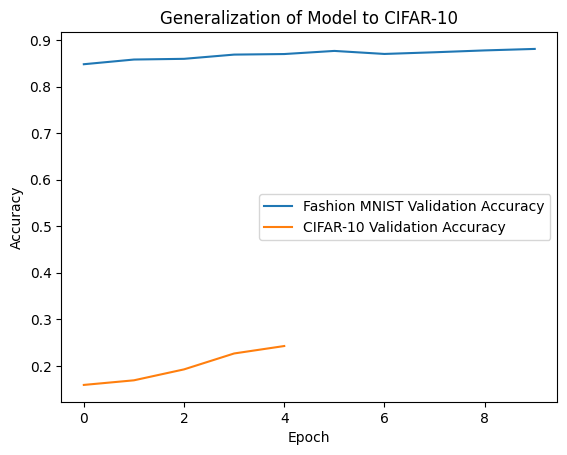

In [12]:
# Test Generalization on CIFAR-10
def preprocess_cifar10():
    (cifar_train, cifar_labels), (cifar_test, cifar_test_labels) = cifar10.load_data()

    # Convert images to grayscale, resize to 28x28, and normalize
    cifar_train_gray = tf.image.rgb_to_grayscale(tf.cast(cifar_train, tf.float32)) / 255.0
    cifar_test_gray = tf.image.rgb_to_grayscale(tf.cast(cifar_test, tf.float32)) / 255.0

    # Resize CIFAR-10 images to 28x28 to match Fashion MNIST model
    cifar_train_resized = tf.image.resize(cifar_train_gray, (28, 28)).numpy()
    cifar_test_resized = tf.image.resize(cifar_test_gray, (28, 28)).numpy()

    # Convert labels to int32
    return (
        cifar_train_resized, cifar_labels.astype(np.int32).flatten(),
        cifar_test_resized, cifar_test_labels.astype(np.int32).flatten()
    )

# Preprocess CIFAR-10 dataset
cifar_train, cifar_labels, cifar_test, cifar_test_labels = preprocess_cifar10()

# Train model on CIFAR-10 grayscale images resized to 28x28
history_cifar = model.fit(cifar_train, cifar_labels, epochs=5, validation_data=(cifar_test, cifar_test_labels))

# Compare accuracy between Fashion MNIST and CIFAR-10 generalization
plt.plot(history.history['val_accuracy'], label='Fashion MNIST Validation Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='CIFAR-10 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Generalization of Model to CIFAR-10')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


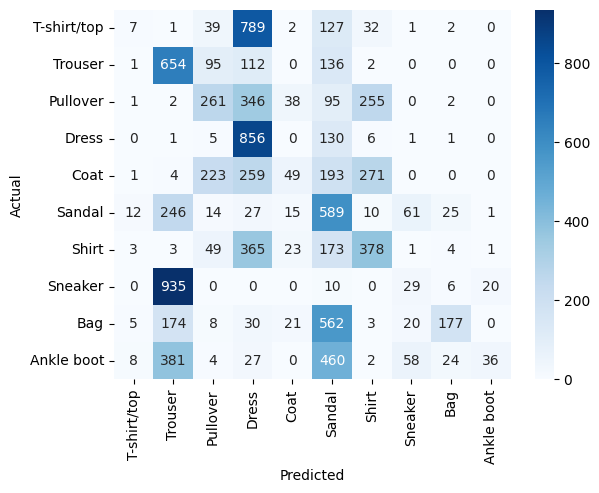

In [13]:
# Generate Confusion Matrix & Classification Report
y_pred = np.argmax(model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


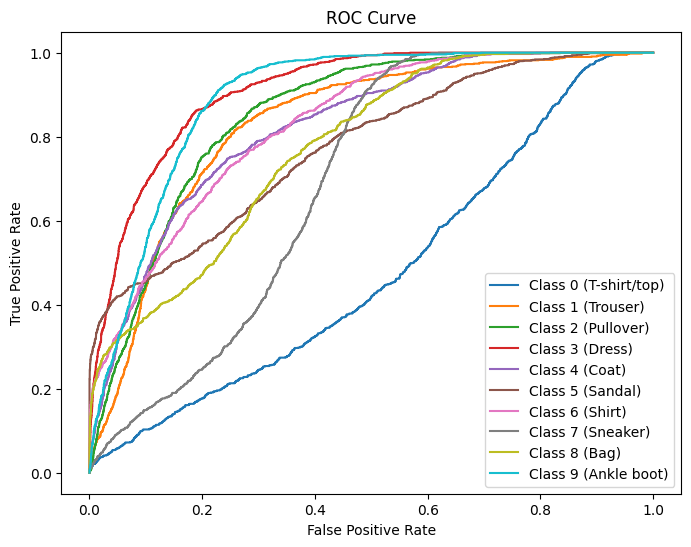

In [14]:
# ROC Curve
y_score = model.predict(test_images)
y_test_bin = to_categorical(test_labels, num_classes=10)
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ({class_names[i]})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
# Final Model Summary & Observations
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None


# Evaluate Fashion MNIST-trained model on CIFAR-10 (28x28 grayscale)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report on CIFAR-10:
              precision    recall  f1-score   support

           0       0.19      0.36      0.25      1000
           1       0.29      0.28      0.28      1000
           2       0.23      0.14      0.18      1000
           3       0.20      0.13      0.16      1000
           4       0.20      0.37      0.26      1000
           5       0.37      0.20      0.26      1000
           6       0.26      0.12      0.16      1000
           7       0.23      0.01      0.02      1000
           8       0.24      0.26      0.25      1000
           9       0.30      0.56      0.39      1000

    accuracy                           0.24     10000
   macro avg       0.25      0.24      0.22     10000
weighted avg       0.25      0.24      0.22     10000



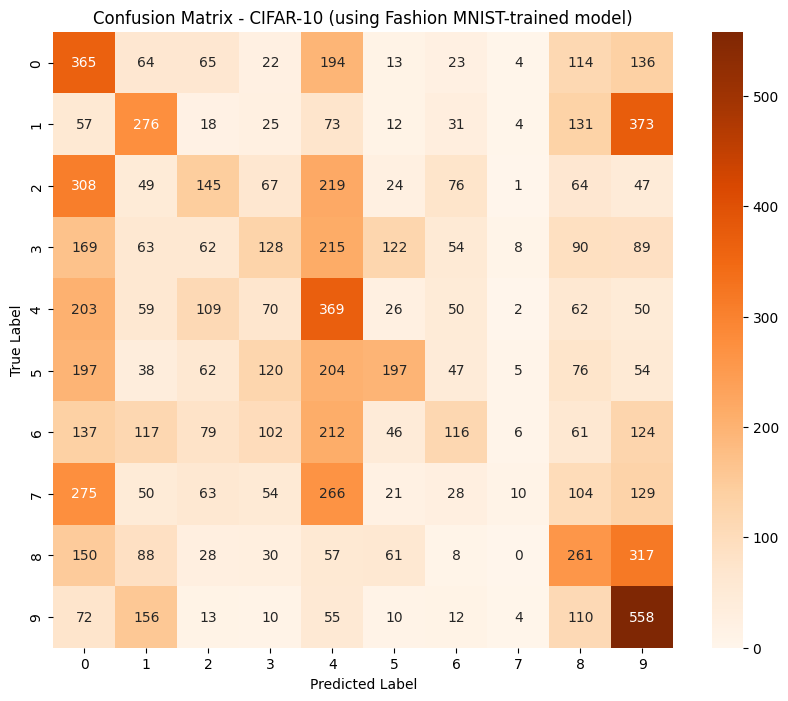

In [17]:
# Predict CIFAR-10 test set
cifar_pred_probs = model.predict(cifar_test.squeeze()) # Remove the channel dimension
cifar_pred_labels = np.argmax(cifar_pred_probs, axis=1)

# Classification Report for CIFAR-10
print("Classification Report on CIFAR-10:")
print(classification_report(cifar_test_labels, cifar_pred_labels))

# Confusion Matrix for CIFAR-10
cifar_cm = confusion_matrix(cifar_test_labels, cifar_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cifar_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - CIFAR-10 (using Fashion MNIST-trained model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

               Experiment  Validation Accuracy (%)
0  Original Fashion MNIST                    88.11
1         Inverted Images                    79.87
2            Noisy Images                    85.65
3           Resized 56x56                    86.52
4       CIFAR-10 Transfer                    24.25


<ipython-input-18-ef3a7ff0f4f9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experiment', y='Validation Accuracy (%)', data=df_acc, palette='coolwarm')


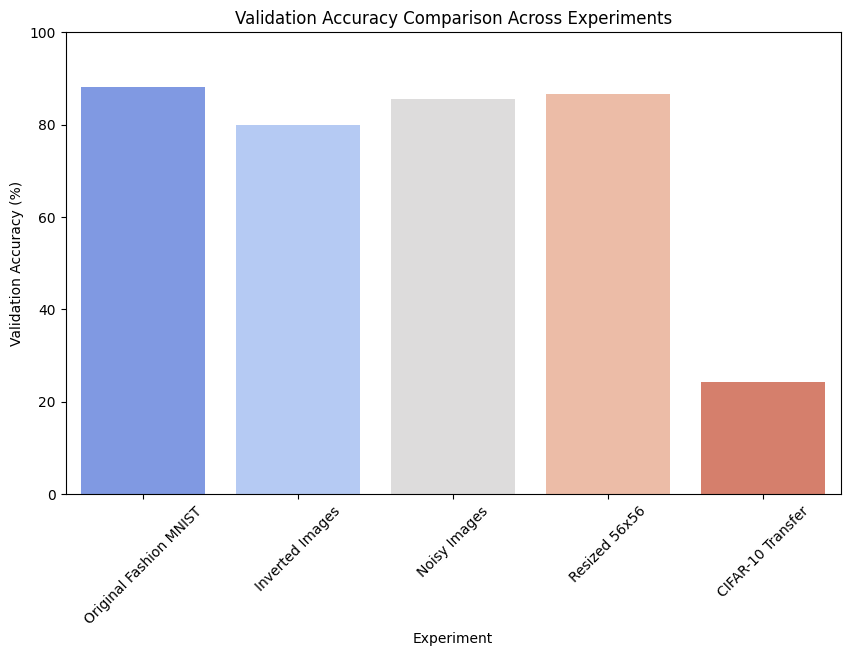

In [18]:
# Accuracy Comparison Table
import pandas as pd

accuracy_data = {
    'Experiment': ['Original Fashion MNIST', 'Inverted Images', 'Noisy Images', 'Resized 56x56', 'CIFAR-10 Transfer'],
    'Validation Accuracy (%)': [
        round(history.history['val_accuracy'][-1] * 100, 2),
        round(history_inverted.history['val_accuracy'][-1] * 100, 2),
        round(history_noisy.history['val_accuracy'][-1] * 100, 2),
        round(history_large.history['val_accuracy'][-1] * 100, 2),
        round(history_cifar.history['val_accuracy'][-1] * 100, 2)
    ]
}
df_acc = pd.DataFrame(accuracy_data)
print(df_acc)

# Bar Plot for Visual Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Experiment', y='Validation Accuracy (%)', data=df_acc, palette='coolwarm')
plt.title('Validation Accuracy Comparison Across Experiments')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

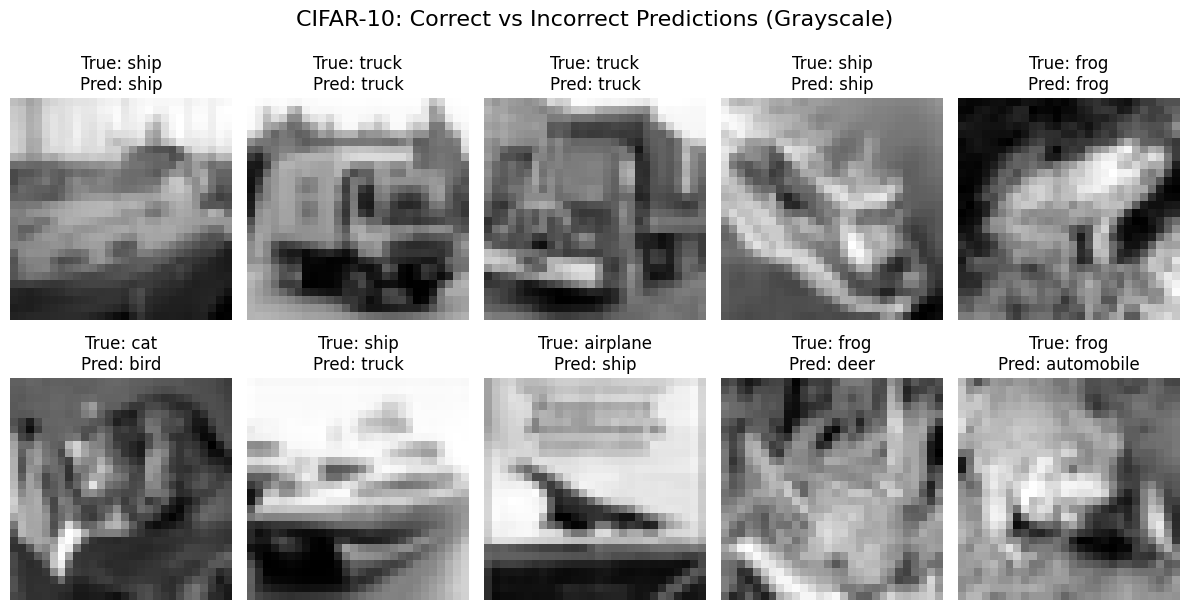

In [19]:
# Visualize CIFAR Predictions (Correct vs Incorrect)
class_labels_cifar10 = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Visualizing 5 correct and 5 incorrect predictions
correct = np.where(cifar_pred_labels == cifar_test_labels)[0]
incorrect = np.where(cifar_pred_labels != cifar_test_labels)[0]

plt.figure(figsize=(12, 6))
for i in range(5):
    idx = correct[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(cifar_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {class_labels_cifar10[cifar_test_labels[idx]]}\nPred: {class_labels_cifar10[cifar_pred_labels[idx]]}")
    plt.axis('off')

for i in range(5):
    idx = incorrect[i]
    plt.subplot(2, 5, i+6)
    plt.imshow(cifar_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {class_labels_cifar10[cifar_test_labels[idx]]}\nPred: {class_labels_cifar10[cifar_pred_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle('CIFAR-10: Correct vs Incorrect Predictions (Grayscale)', fontsize=16, y=1.05)
plt.show()

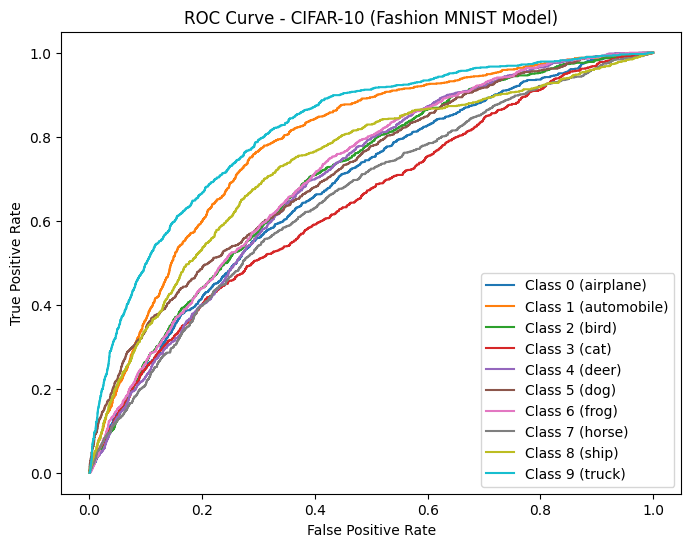

In [20]:
# Multi-class ROC for CIFAR-10
cifar_test_bin = to_categorical(cifar_test_labels, num_classes=10)

plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(cifar_test_bin[:, i], cifar_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ({class_labels_cifar10[i]})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CIFAR-10 (Fashion MNIST Model)')
plt.legend()
plt.show()